<h1 style="text-align: center;">RESEARCH ON CARBON EMISSIONS AND GDP IN USA</h1>
<h2 style="text-align: center;">final project for analytic programming</h1>




- Team Member: Ruoyu Chen, Wei Lo, Zhengnan Li
- Repository: https://github.com/Zhengnan817/Final-Project-Carbon-emission


## Abstract

dataset1: gdp:
api1: emmission:https://api.eia.gov/v2/co2-emissions/co2-emissions-aggregates/data/?frequency=annual&data[0]=value&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000  
api2: coefficient:https://api.eia.gov/v2/co2-emissions/co2-emissions-and-carbon-coefficients/data/?frequency=annual&data[0]=carbon-coefficient&data[1]=emissions&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000

## 1.Introduction 
Describe your project, including the scientific or business motivation for the research question you have chosen to answer. This section should summarize the content of your Final Project Proposal, so be sure to explain your research question, describe the source and content of the data set you have chosen to work with, and summarize your approach to meeting the requirements for the Project.

#### 1.1 Significance of the Study

#### 1.2 Research Questiom

#### 1.3 Data Source

#### 1.3.1 dataset1 - BEA GDP by State
BEA estimates the value of the goods and services produced in each state and the District of Columbia quarterly and annually. The data include breakdowns of industries' contributions to each of these economies.

- Link: https://www.bea.gov/data/gdp/gdp-state
- Data Variables:

| Variable          | Description                                                                                     |
|-------------------|-------------------------------------------------------------------------------------------------|
| GeoFIPS           | The Geographic identifier                                                                       |
| GeoName           | Name of the geographical region(State name)                                                     |
| Region            | Region ID                                                                                       |
| TableName         | Table name(There are different table on the website)                                            |
| LineCode          | Indicater of the current escription                                                             |
| IndustryClassification | The classification of the industry                                                         |
| Description       | The type of data indicates                                                                      |
| Unit              | Unit of measurement                                                                             |
| 2017-2022         | Data for the years 2017 to 2022                                                                 |

Load the data and show the first 5 rows:

In [1]:
import pandas as pd
dataset1_url = "https://raw.githubusercontent.com/Zhengnan817/Final-Project-Carbon-emission/main/SAGDP1__ALL_AREAS_2017_2022.csv"
df_gdp_raw = pd.read_csv(dataset1_url)
df_gdp_raw.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2017,2018,2019,2020,2021,2022
0,"""00000""",United States,,SAGDP1,1.0,...,Real GDP (millions of chained 2017 dollars) 1/,Millions of chained 2017 dollars,19612102.0,2.019390e+07,2.069209e+07,2.023407e+07,2.140769e+07,2.182204e+07
1,"""00000""",United States,,SAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,100.0,1.029670e+02,1.055070e+02,1.031710e+02,1.091560e+02,1.112680e+02
2,"""00000""",United States,,SAGDP1,3.0,...,Current-dollar GDP (millions of current dollars),Millions of current dollars,19612102.0,2.065652e+07,2.152140e+07,2.132295e+07,2.359403e+07,2.574411e+07
3,"""00000""",United States,,SAGDP1,4.0,...,Compensation (millions of dollars),Millions of current dollars,10434978.0,1.096769e+07,1.145978e+07,1.160229e+07,1.255663e+07,1.345524e+07
4,"""00000""",United States,,SAGDP1,5.0,...,Gross operating surplus (millions of dollars),Millions of current dollars,7873027.0,8.295055e+06,8.601459e+06,8.857004e+06,9.848221e+06,1.060610e+07


#### 1.3.2 dataset2 - Carbon Dioxide Emissions
The U.S. Energy Information Administration is committed to its free and open data by making it available through an Application Programming Interface (API) and its open data tools. EIA's API is multi-facetted and contains the following time-series data sets organized by the main energy categories.

- Link: https://www.eia.gov/opendata/browser/co2-emissions/co2-emissions-aggregates
- Data Variables:

| Variable       | Description                                        |
|----------------|----------------------------------------------------|
| period         | The year of the recorded data                       |
| sectorId       | Sector identifier                                  |
| sector-name    | Name of the sector of the carbon dioxide emission source (Commercial, Residential,Electric Power,etc.)                |
| fuelId         | Fuel identifier                                    |
| fuel-name      | Name of the fuel that produce co2(Petroleum,Coal,Natural Gas)                                    |
| stateId        | State identifier                                   |
| state-name     | Name of the state or region                         |
| value          | The value of the rows                       |
| value-units    | The unit of the value        |

Load the data using class APIReader and show the first 5 rows:

In [2]:
from carbon_emission.data_prep import APIReader
reader = APIReader()
df_co2_raw = reader.get_data()
df_co2_raw.head()

Fetching Data: 100%|██████████| 5/5 [00:05<00:00,  1.06s/it]


,period,sectorId,sector-name,fuelId,fuel-name,stateId,state-name,value,value-units
0,2017,RC,Residential carbon dioxide emissions,CO,Coal,AK,Alaska,0.000000,million metric tons of CO2
1,2017,RC,Residential carbon dioxide emissions,PE,Petroleum,AK,Alaska,0.602780,million metric tons of CO2
2,2017,RC,Residential carbon dioxide emissions,NG,Natural Gas,AK,Alaska,1.058200,million metric tons of CO2
3,2017,RC,Residential carbon dioxide emissions,TO,All Fuels,AK,Alaska,1.660980,million metric tons of CO2
4,2017,CC,Commercial carbon dioxide emissions,CO,Coal,AK,Alaska,0.683419,million metric tons of CO2


##### 1.3.3 Extra Dataset
GeoJSON: https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_1_states_provinces.geojson   
A json file aquired to support the chart of USA map. We will not elaborate on this dataset for it is not the focus of this analysis.


## 2.Research Approach

## 3.Exploratory Data Analysis

#### 3.1 Dataset1 - BEA GDP by State
First initialize the class EDAPerformer.

In [3]:
from carbon_emission.eda import EDAPerformer
eda_gdp = EDAPerformer(df_gdp_raw)

The columns are: ['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode', 'IndustryClassification', 'Description', 'Unit', '2017', '2018', '2019', '2020', '2021', '2022']


##### - GeoFIPS & Region & LineCode  
GeoFIPS and Region is the id of each state in the USA, each id indicates a different state;  Line code is the indicator of each description.  
The id has no meaning for this analysis thus These columns can be dropped.

##### - GeoName
GeoName is the name of the geographical region. This column contains 60 unique elements representing states or regions in the United States, including 1 United States, 50 individual states, 1 Washington district, and 8 regions (such as New England, Mideast, Great Lakes, etc.).

In [4]:
display(df_gdp_raw['GeoName'].describe())
df_gdp_raw['GeoName'].unique()

count               480
unique               60
top       United States
freq                  8
Name: GeoName, dtype: object

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'New England', 'Mideast',
       'Great Lakes', 'Plains', 'Southeast', 'Southwest',
       'Rocky Mountain', 'Far West', nan], dtype=object)

The chart below uses the api of GeoJSON from Natural Earth to show whether the data has all the states in the USA. Mark the states covered as blue, and the states not covered as grey. From the map below, all the states are covered in column GeoName.

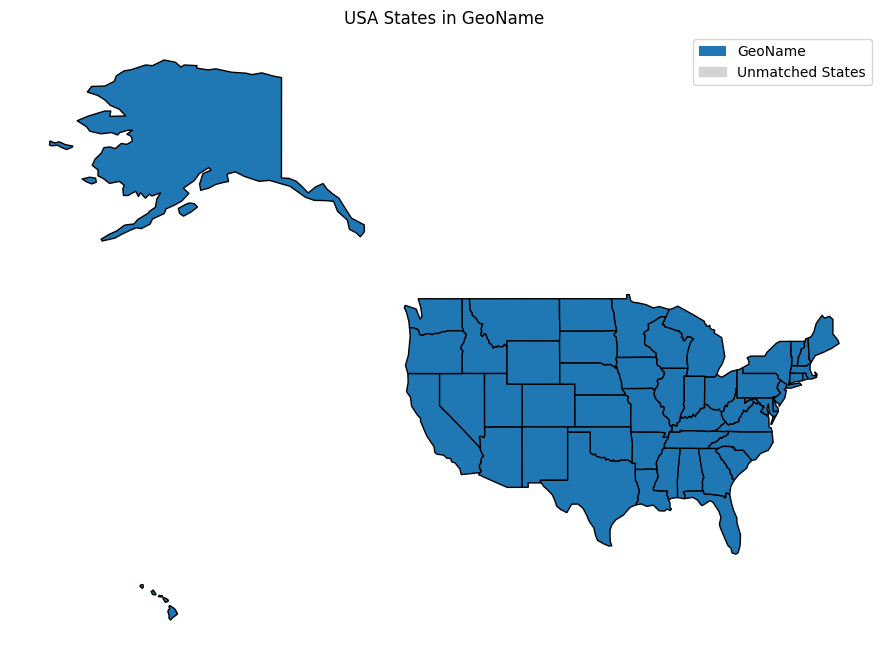

In [5]:
usa_map = eda_gdp.get_map()
eda_gdp.GeoName_map('GeoName')

##### - TableName & IndustryClassification
TableName indicate the code for this whole dataset; IndustryClassification has '...' for all rows.  
These two columns has no meaning for this analysis thus These column can be dropped.

In [6]:
df_gdp_raw[['TableName','IndustryClassification']].describe()

,TableName,IndustryClassification
count,480,480
unique,1,1
top,SAGDP1,...
freq,480,480


##### - Description
Description is the type of data indicates. There are 8 types of data and each has 60 rows of data, each row for a GeoName. The data we need is 'Current-dollar GDP (millions of current dollars)', the rest of the Description type will be dropped.

In [7]:
df_gdp_raw['Description'].value_counts()

Description
Real GDP (millions of chained 2017 dollars) 1/                                 60
Chain-type quantity indexes for real GDP                                       60
Current-dollar GDP (millions of current dollars)                               60
Compensation (millions of dollars)                                             60
Gross operating surplus (millions of dollars)                                  60
Taxes on production and imports (TOPI) less subsides (millions of dollars)     60
 Taxes on production and imports (TOPI) (millions of dollars)                  60
 Subsidies (millions of dollars)                                               60
Name: count, dtype: int64

##### - Unit
Unit is the unit of measurement. It matches the Description. For this analysis, Current-dollar GDP (millions of current dollars)  has the unit as 'Millions of current dollars'.

##### - column 2017, 2018, 2019, 2020, 2021, 2022
The column 2017-2022 contains the data of each description for the corresponding year. These data should not be in different columns in this analysis and will be reshaped from wide format into a long format. And the data needs to be group by and filtered.  
Take the 2017 data as an example, filter the Description we need, which is Current-dollar GDP, and do a histogram of the gdp all rows. This data suggests a wide variability in Current-dollar GDP figures. The average is around \$977,122.3, with a notable standard deviation of \$2,626,492.0, indicating significant variability from the mean. The range spans from a minimum of \$32,589.2 to a maximum of \$19,612,100.0. Most values (75%) fall within the range of \$119,985.3 to \$659,468.2, highlighting a diverse distribution. The highest value should be the row 'united states' which is the sum of all states.

In [8]:
filtered_df = df_gdp_raw[df_gdp_raw['Description'] == 'Current-dollar GDP (millions of current dollars) ']
filtered_df['2017'].describe()

count    6.000000e+01
mean     9.771223e+05
std      2.626492e+06
min      3.258920e+04
25%      1.199853e+05
50%      3.165803e+05
75%      6.594682e+05
max      1.961210e+07
Name: 2017, dtype: float64

Plot these results and visuallize the data with histogram through Seaborn.

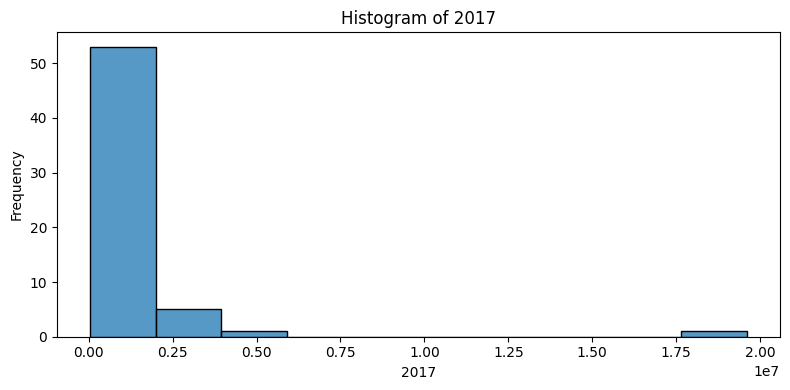

In [9]:

eda_gdp.hist_chart('2017',filtered_df)

#### 3.2 Dataset2 - Carbon Dioxide Emissions
First initialize the class EDAPerformer.

In [10]:
eda_co2 = EDAPerformer(df_co2_raw)

The columns are: ['period', 'sectorId', 'sector-name', 'fuelId', 'fuel-name', 'stateId', 'state-name', 'value', 'value-units']


##### - period
Period is the year of the recorded data. There are 5 years of data, and each year has the 1248 rows of data.

In [11]:
df_co2_raw['period'].value_counts()

period
2017    1248
2018    1248
2019    1248
2020    1248
2021    1248
Name: count, dtype: int64

##### - sectorId & fuelId & stateId
sectorId is the identifier of each 'sector-name'; fuelId is the identifier of 'fuel-name'; stateId is the identifier of each 'state-name'.  
The id has no meaning for this analysis thus These columns can be dropped.

##### - sector-name
Name of the sector of the corbon diocide emission source. There are 6 sectors of emission source and each source has 1040 rows of data. Each **************

In [12]:
df_co2_raw['sector-name'].value_counts()

sector-name
Residential carbon dioxide emissions               1040
Commercial carbon dioxide emissions                1040
Transportation carbon dioxide emissions            1040
Electric Power carbon dioxide emissions            1040
Industrial carbon dioxide emissions                1040
Total carbon dioxide emissions from all sectors    1040
Name: count, dtype: int64

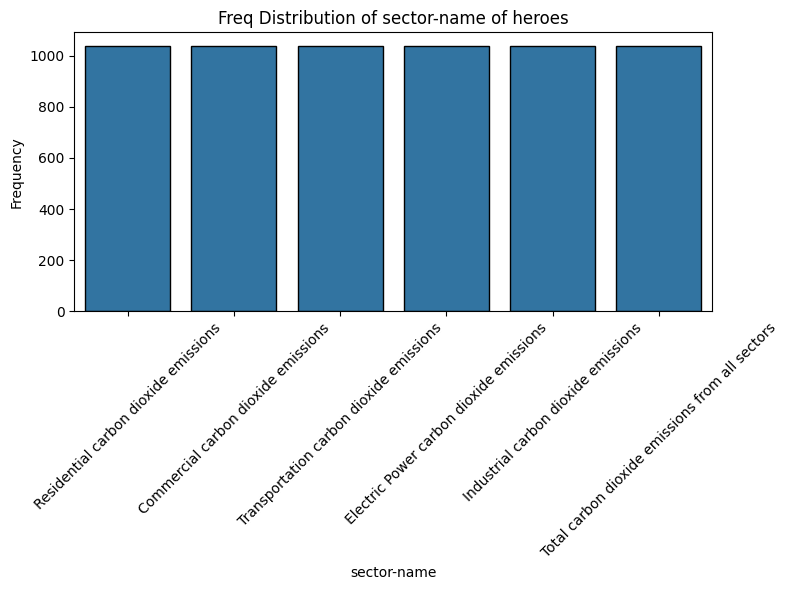

In [13]:
eda_co2.bar_chart('sector-name')

##### - fuel-name
Name of the fuel that produce co2. There are 3 types of fuel, and 1 is the sum of 3 types of fuels. Each of the fuel type has 1560 rows of data.

In [14]:
df_co2_raw['fuel-name'].value_counts()

fuel-name
Coal           1560
Petroleum      1560
Natural Gas    1560
All Fuels      1560
Name: count, dtype: int64

##### - state-name
state-name is the name of the geographical region. This column contains 52 unique elements representing states in the United States, including 1 United States, 50 individual states, and 1 Washington district.

In [15]:
display(df_co2_raw['state-name'].describe())
df_co2_raw['state-name'].unique()

count       6240
unique        52
top       Alaska
freq         120
Name: state-name, dtype: object

array(['Alaska', 'Rhode Island', 'North Carolina', 'California',
       'Minnesota', 'Massachusetts', 'Alabama', 'Michigan', 'Maine',
       'Louisiana', 'Colorado', 'Missouri', 'South Carolina', 'Tennessee',
       'South Dakota', 'New York', 'Nevada', 'Oregon', 'Mississippi',
       'Ohio', 'Pennsylvania', 'Montana', 'Oklahoma', 'North Dakota',
       'Arizona', 'Arkansas', 'Kentucky', 'Utah', 'Maryland', 'Kansas',
       'Iowa', 'Texas', 'Wyoming', 'New Jersey', 'United States',
       'West Virginia', 'Virginia', 'Wisconsin', 'Nebraska',
       'New Hampshire', 'New Mexico', 'Vermont', 'Connecticut',
       'Delaware', 'Georgia', 'Indiana', 'Washington', 'Idaho', 'Florida',
       'Hawaii', 'District of Columbia', 'Illinois'], dtype=object)

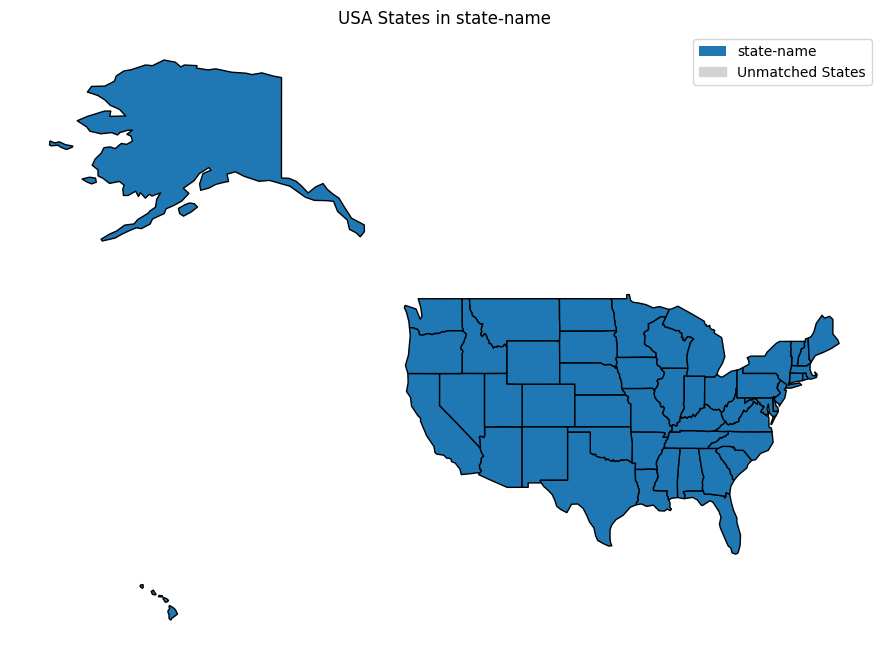

In [16]:
usa_map = eda_co2.get_map()
eda_co2.GeoName_map('state-name')

##### - value
The value of the current row. This data needs group by to show its meaning.

##### - value-units
value-units is the unit of measurement. For this analysis, all rows have the unit as 'million metric tons of CO2'.

# 4.Data Preparation

First initialize the class for data preparation.

In [17]:
from carbon_emission.data_prep import DataPrep
cleaner_gdp= DataPrep(df_gdp_raw)
cleaner_co2= DataPrep(df_co2_raw)

##### 4.1 Data cleaning
Check the null values. The null_check below shows the null value in each column. The lighter color indicates a null value. As shown, there are 4 null values in all columns except GeoFIPS. And they are in the last few lines of the dataset.

GeoName                   4
Region                    4
TableName                 4
LineCode                  4
IndustryClassification    4
Description               4
Unit                      4
2017                      4
2018                      4
2019                      4
2020                      4
2021                      4
2022                      4
GeoFIPS                   0
dtype: int64

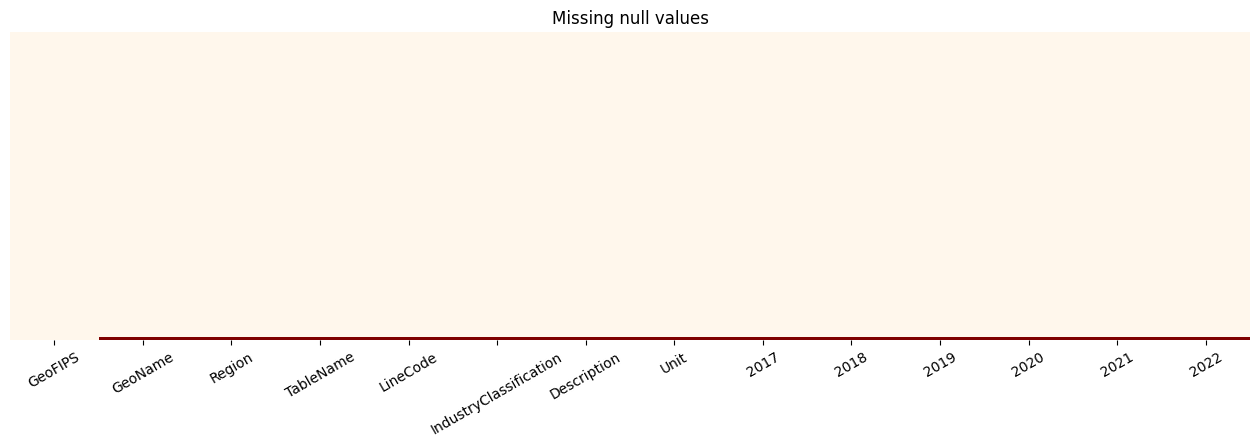

In [18]:
cleaner_gdp.null_check()

For the last 4 rows of the dataset, there are notes in the GeoFIPS column, so these rows has no meaning and can be dropped.

In [19]:
display(df_gdp_raw.tail())


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2017,2018,2019,2020,2021,2022
479,"""98000""",Far West,8,SAGDP1,8.0,...,Subsidies (millions of dollars),Millions of current dollars,-10287.4,-10697.4,-11253.6,-100592.7,-84556.8,-25748.9
480,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
481,SAGDP1: State annual gross domestic product (G...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
482,"Last updated: September 29, 2023-- revised sta...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
483,U.S. Bureau of Economic Analysis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
cleaner_gdp.drop_null()

GeoFIPS                   0
GeoName                   0
Region                    0
TableName                 0
LineCode                  0
IndustryClassification    0
Description               0
Unit                      0
2017                      0
2018                      0
2019                      0
2020                      0
2021                      0
2022                      0
dtype: int64

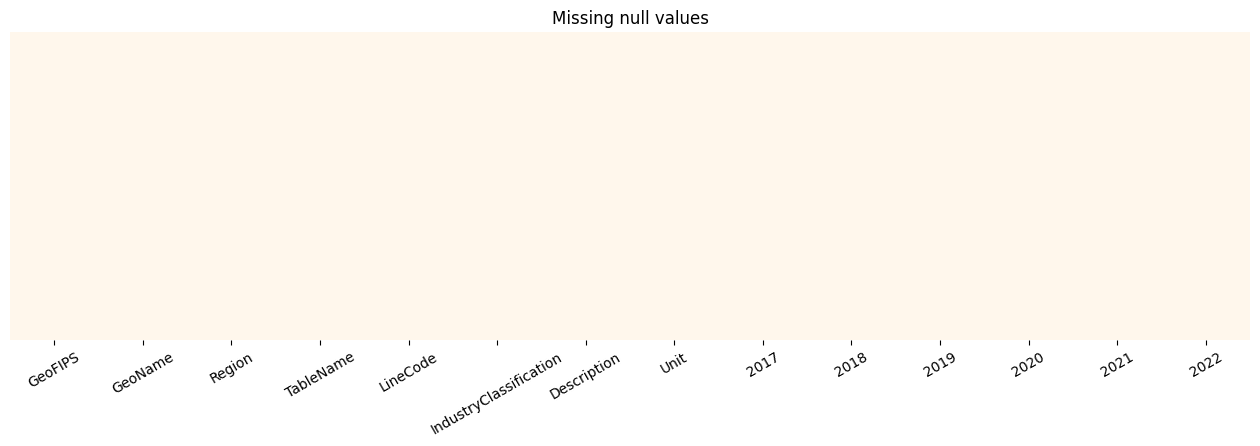

In [21]:
cleaner_gdp.null_check()

The second dataset has no null value.

period         0
sectorId       0
sector-name    0
fuelId         0
fuel-name      0
stateId        0
state-name     0
value          0
value-units    0
dtype: int64

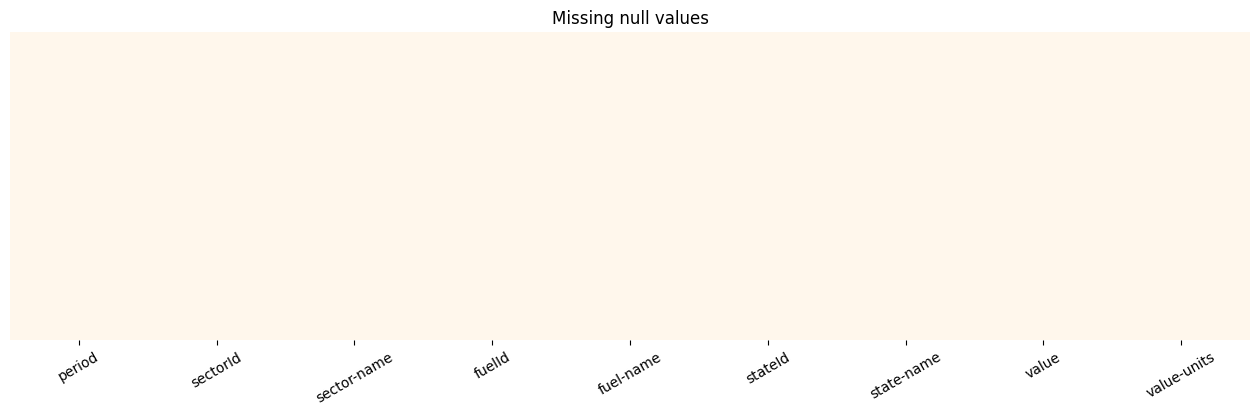

In [22]:
cleaner_co2.null_check()


Drop the column not needed an both dataset.

In [23]:
columns_to_exclude = ['GeoFIPS', 'Region', 'TableName', 'LineCode', 'IndustryClassification', 'Unit']
df_gdp_c = cleaner_gdp.delete_columns(columns_to_exclude)
display(df_gdp_c.columns)



columns_to_exclude = [ 'sectorId',  'fuelId',  'stateId', 'value-units']
df_co2_c = cleaner_co2.delete_columns(columns_to_exclude)
display(df_co2_c.columns)

Index(['GeoName', 'Description', '2017', '2018', '2019', '2020', '2021',
       '2022'],
      dtype='object')

Index(['period', 'sector-name', 'fuel-name', 'state-name', 'value'], dtype='object')

4.2 Data Filtering

Select the states in united states and exclude the others. 

In [25]:
df_gdp_c = df_gdp_c[df_gdp_c['GeoName'].isin(usa_map['name'])]

In [27]:
df_gdp_c = df_gdp_c[df_gdp_c['Description']=='Current-dollar GDP (millions of current dollars) ']



In [29]:
columns_to_exclude = ['Description']
df_gdp_c = cleaner_gdp.delete_columns(columns_to_exclude,df_gdp_c)

#### 4.3 Data Reshape

In [36]:
df_gdp = pd.melt(df_gdp_c, id_vars=['GeoName'], var_name='Year', value_name='Current-dollar GDP')

In [37]:
df_gdp

,GeoName,Year,Current-dollar GDP
0,Alabama,2017,216615.5
1,Alaska,2017,53550.9
2,Arizona,2017,333099.0
3,Arkansas,2017,123882.6
4,California,2017,2740550.3
...,...,...,...
301,Virginia,2022,663105.5
302,Washington,2022,738101.4
303,West Virginia,2022,97417.3
304,Wisconsin,2022,396209.3


In [ ]:
eda_gdp=EDAPerformer(df_gdp)
eda_gdp.bar_chart()

# 5.Prepped Data Review


# 6.Investigative Analysis & Results

# 7.Conclusions 